# Modeling Multivariate Distributions
In this tutorial, we'll demonstrate some of the different tools provided by **Copulas** for modeling multivariate distributions.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_rows', 5)

def side_by_side_plot(real, synthetic):
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(real["x"], real["y"], real["z"])
    ax.set_title("Real")
    ax.title.set_position([.5, 1.05])

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(synthetic["x"], synthetic["y"], synthetic["z"])
    ax.set_title("Synthetic")
    ax.title.set_position([.5, 1.05])
    
    plt.tight_layout()
    plt.show()

## Gaussian Copulas
The `GaussianMultivariate` class allows us to model multivariate distributions with a Gaussian copula. By default, it estimates the marginal distribution for each column and the estimates the joint distribution with a Gaussian copula.

/Users/kevz/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


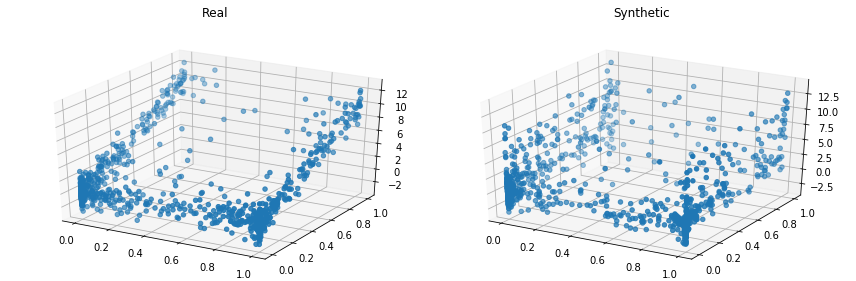

In [2]:
from copulas.datasets import load_three_dimensional
from copulas.multivariate import GaussianMultivariate

data = load_three_dimensional()

copula = GaussianMultivariate()
copula.fit(data)
synthetic = copula.sample(1000)

side_by_side_plot(data, synthetic)

However, more advanced users can choose to manually specify the marginal distributions if they have additional information about the data. Alternatively, they can constrain the automatic selection to only consider certain types of models.

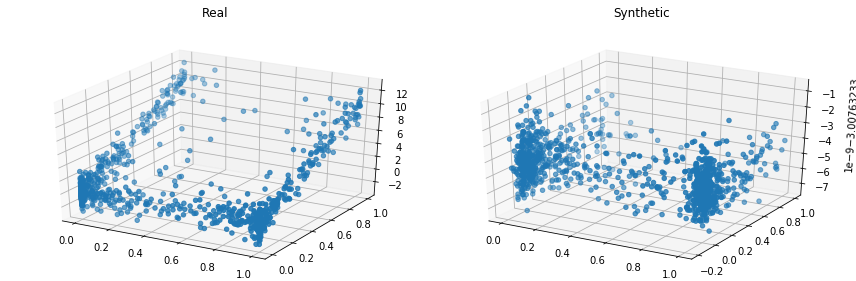

In [3]:
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import Univariate, GaussianKDE, BetaUnivariate, ParametricType

data = load_three_dimensional()

copula = GaussianMultivariate({
    "x": Univariate(parametric=ParametricType.PARAMETRIC),  # use a parametric distribution
    "y": GaussianKDE(),                                     # use a Gaussian KDE for this column
    "z": BetaUnivariate(),                                  # use a Beta distribution for this column
})
copula.fit(data)
synthetic = copula.sample(1000)

side_by_side_plot(data, synthetic)

In general, however, you shouldn't need to manually specify the univariate distributions as **Copulas** will automatically identify the best fitting marginal distribution.

## Vine Copulas
In addition, **Copulas** also implements Vine copulas. The Vine copulas work by building a [vine](https://en.wikipedia.org/wiki/Vine_copula) (a set of trees) over the different columns in the dataset and estimating the pairwise (i.e. bivariate) relationship between the nodes on every edge. There are three types of Vine copulas: *direct*, *regular*, and *center*. The following code demonstrates how you can use a `C-vine copula` to model the above dataset.

/Users/kevz/Desktop/Copulas/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


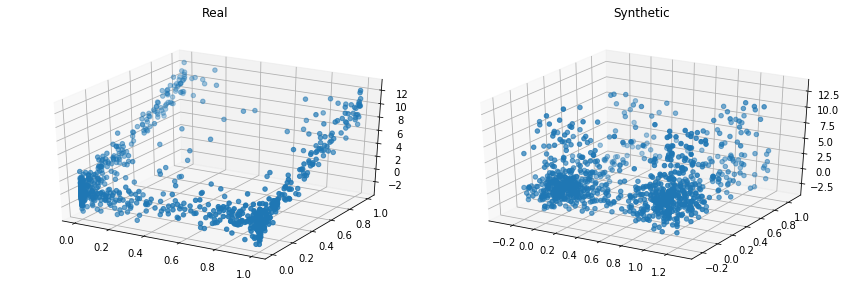

In [4]:
from copulas.multivariate import VineCopula

data = load_three_dimensional()

copula = VineCopula('center') # or 'direct' or `regular`
copula.fit(data)
synthetic = copula.sample(1000)

side_by_side_plot(data, synthetic)